<a href="https://colab.research.google.com/github/pratickjha/Analytics-Project-repository/blob/master/EDA_on_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#set plot style for better asthetics
sns.set(style='whitegrid')

In [4]:
#clone the repository into the local
!git clone 'https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset'

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 4.17 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [5]:
#Load the dataset from url
titanic_df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/Titanic-Dataset.csv')

#check the concise summary of the dataset
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Check the data sample using head command
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
#check the last 5 rows with tail command

titanic_df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [8]:
titanic_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

**Interpretation of .describe(): **
 * Survived - About 38.4% passengers survived
 * Age - from 5 months to 80 yrs with an avg age of 29.7 Yrs
 * Fare - Highly Skewed as min fair was 0 however the maximum fare was 512 and mean is ar 32 which shows many outliers in the DATASET
   

  

In [9]:
titanic_df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [10]:
#check count of missing values in each column before clean-up

titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Handle missing Age column with median age as using mean can be skewed
median_age =titanic_df['Age'].median()
titanic_df['Age']=titanic_df['Age'].fillna(median_age)


In [12]:
#verify the column should not have any missing values
print("Missing values after Age cleaning:")
print(titanic_df[['Age','Embarked','Cabin']].isna().sum())

Missing values after Age cleaning:
Age           0
Embarked      2
Cabin       687
dtype: int64


In [13]:
#handle missing Embarked column with mode as it has only 2 missing values and we'll fill it with mode to use the most commmon value
mode_Embarked=titanic_df['Embarked'].mode()[0]
print(mode_Embarked)
titanic_df['Embarked']=titanic_df['Embarked'].fillna(mode_Embarked)

S


In [14]:
#verify the column should not have any missing values
print("Missing values after Embarked cleaning:")
print(titanic_df[['Age','Embarked','Cabin']].isna().sum())

Missing values after Embarked cleaning:
Age           0
Embarked      0
Cabin       687
dtype: int64


In [15]:
# Handle the cabin missing values with has_cabin new column as most of the values are missing
#having 77% missing value is not good for inputing hence we'll create anew Feature "Has_Cabin"\\
if 'Cabin' in titanic_df.columns:
    titanic_df['Has_Cabin']=titanic_df['Cabin'].notna().astype(int)  #1 if has cabin, 0 if not
    titanic_df.drop('Cabin',axis=1,inplace=True)

In [16]:
#verify the column should not have any missing values
print("Missing values after Embarked cleaning:")
print(titanic_df[['Age','Embarked','Has_Cabin']].isna().sum())

Missing values after Embarked cleaning:
Age          0
Embarked     0
Has_Cabin    0
dtype: int64


In [17]:
titanic_df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male  28.0      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Embarked  Has_Cabin  
0      0         A/5 21171   7.2500        S          0  
1      0          PC 17599  71.2833        C          1  
2      0  STON/O2. 3101282   7.9250        S          0  
3      0            113803  53.1000        S          1  
4      0            373450   8.0500        S          0  
5      0            330877   8.4583        Q          0  
6      0             17463  51.8625        S          1  
7      1            349909  21.0750        S          0  
8      2            347742  11.1333        S          0  
9      0            237736  30.0708        C          0

In [18]:
titanic_df['Has_Cabin'].value_counts()

Has_Cabin
0    687
1    204
Name: count, dtype: int64

In [19]:
#check missing values for all
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

##Step 4: Univeriate Analysis
We analyze each variable indivisually to uncerstand the distribution.

- **For Categorical Variable:** we'll use frequency tables, bar charts(countplot), or pie charts to see the count or proportion of each category.

- **For Numerical Variables:** we'll use (histplot) or kernel density plot (kdeplot) to understand the distribution, and (boxplot) to identify the central tendency, spread, outliers

In [20]:
{col: titanic_df[col].value_counts() for col in ['Survived','Pclass','Sex','Embarked','SibSp','Parch']}



{'Survived': Survived
 0    549
 1    342
 Name: count, dtype: int64,
 'Pclass': Pclass
 3    491
 1    216
 2    184
 Name: count, dtype: int64,
 'Sex': Sex
 male      577
 female    314
 Name: count, dtype: int64,
 'Embarked': Embarked
 S    646
 C    168
 Q     77
 Name: count, dtype: int64,
 'SibSp': SibSp
 0    608
 1    209
 2     28
 4     18
 3     16
 8      7
 5      5
 Name: count, dtype: int64,
 'Parch': Parch
 0    678
 1    118
 2     80
 5      5
 3      5
 4      4
 6      1
 Name: count, dtype: int64}

In [21]:
{col: titanic_df[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%' for col in ['Survived','Pclass','Sex','Embarked','SibSp','Parch']}

{'Survived': Survived
 0    61.6%
 1    38.4%
 Name: proportion, dtype: object,
 'Pclass': Pclass
 3    55.1%
 1    24.2%
 2    20.7%
 Name: proportion, dtype: object,
 'Sex': Sex
 male      64.8%
 female    35.2%
 Name: proportion, dtype: object,
 'Embarked': Embarked
 S    72.5%
 C    18.9%
 Q     8.6%
 Name: proportion, dtype: object,
 'SibSp': SibSp
 0    68.2%
 1    23.5%
 2     3.1%
 4     2.0%
 3     1.8%
 8     0.8%
 5     0.6%
 Name: proportion, dtype: object,
 'Parch': Parch
 0    76.1%
 1    13.2%
 2     9.0%
 5     0.6%
 3     0.6%
 4     0.4%
 6     0.1%
 Name: proportion, dtype: object}

Analysing categorical Features:


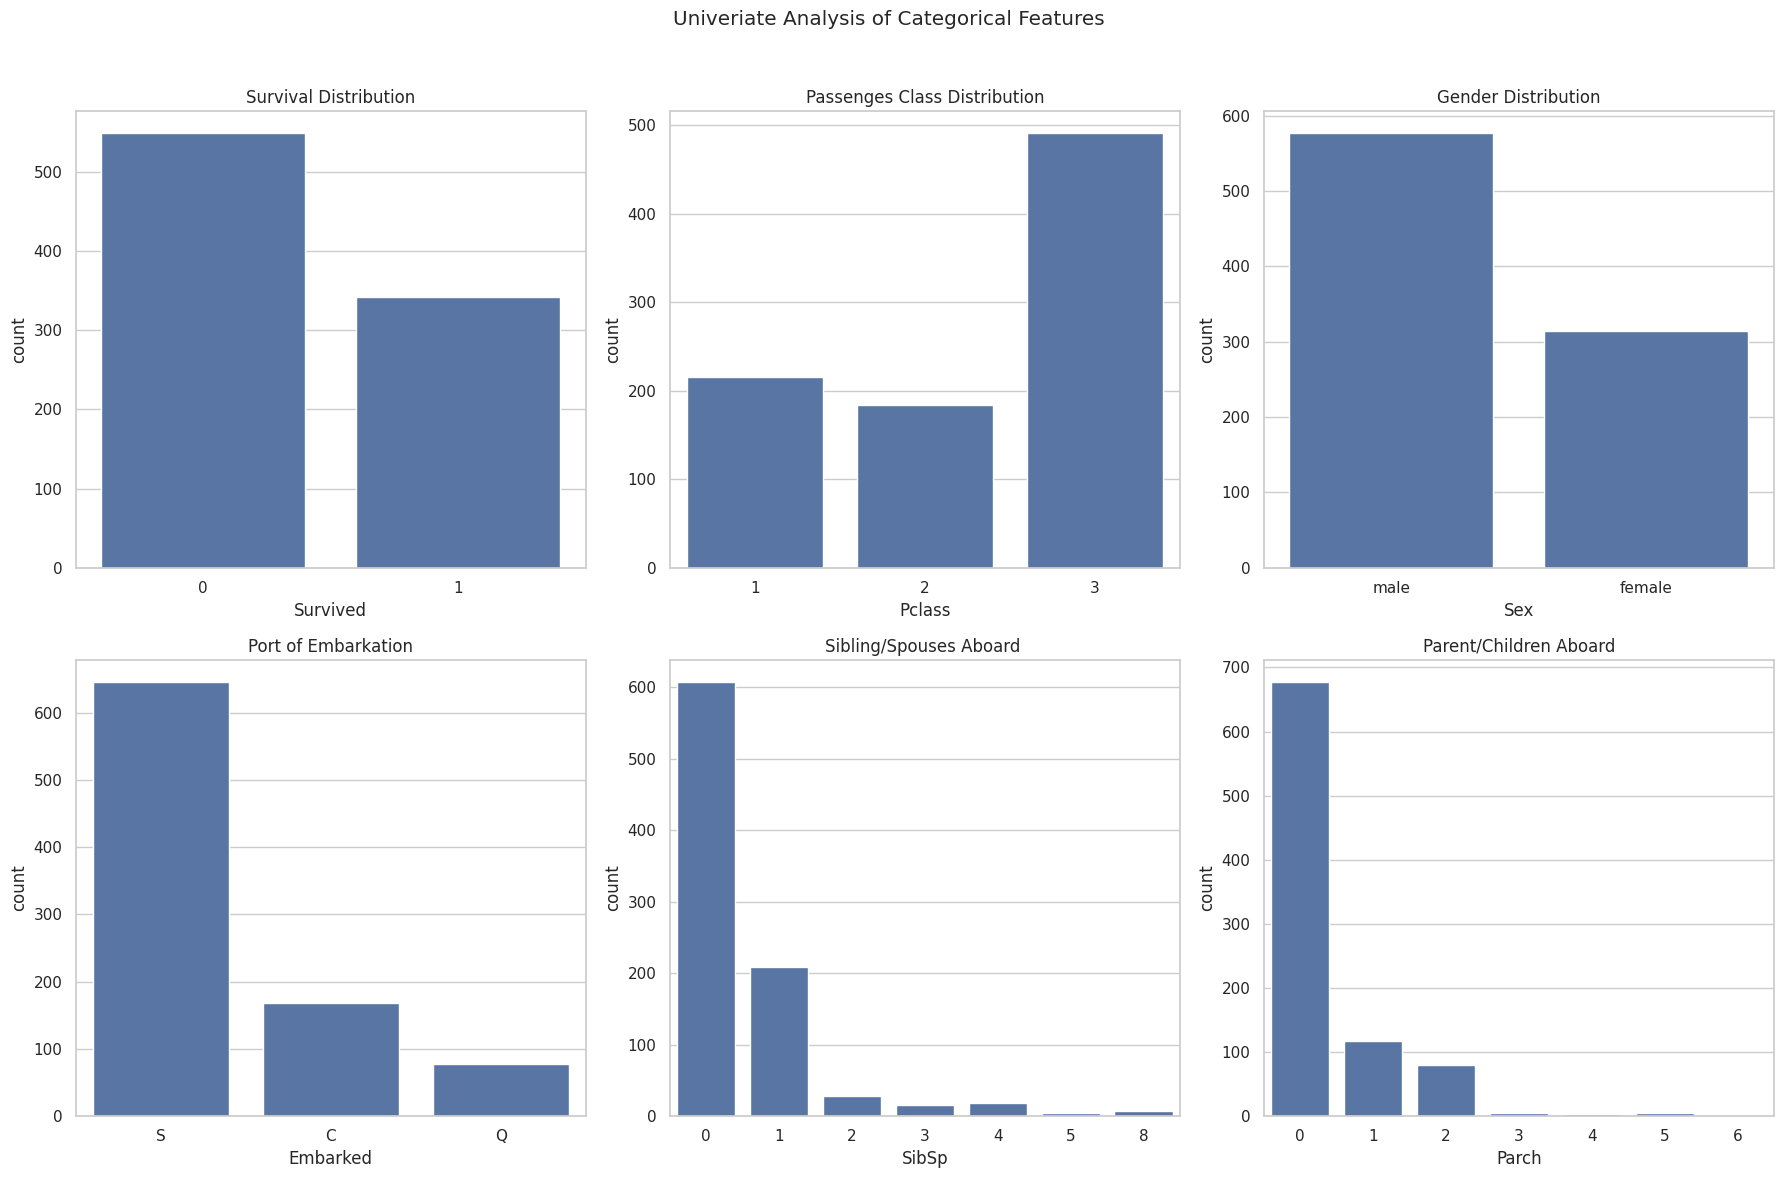

In [22]:
print('Analysing categorical Features:')

#set up the figures for plotting

fig, axes = plt.subplots(2,3,figsize=(18,12))
fig.suptitle('Univeriate Analysis of Categorical Features ')
#PLoting Each Categorical Feature

sns.countplot(ax=axes[0,0],x='Survived', data=titanic_df).set_title('Survival Distribution')
sns.countplot(ax=axes[0,1],x='Pclass', data=titanic_df).set_title('Passenges Class Distribution')
sns.countplot(ax=axes[0,2],x='Sex', data=titanic_df).set_title('Gender Distribution')
sns.countplot(ax=axes[1,0],x='Embarked', data=titanic_df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1,1],x='SibSp', data=titanic_df).set_title('Sibling/Spouses Aboard ')
sns.countplot(ax=axes[1,2],x='Parch', data=titanic_df).set_title('Parent/Children Aboard')
#sns.countplot(ax=axes[2,1],x='Has_Cabin', data=titanic_df).set_title('Has Cabin')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

#### **Summary of the univariate analysis**

- **Survival** - Most people (61.8%)did not survive

- **Passenger Class** - Most passenger(55%) were travelling in class 3

- **Gender Distribution** - Male passergers are significantly more than Female passenger -- Male 65%, Female- 35%

- **Port of Embarkment** - Most people embarked from Southampton (S)
- **Sibling Spouse Parents Children** - most people are travelling alone




Analyzing Numerical Features


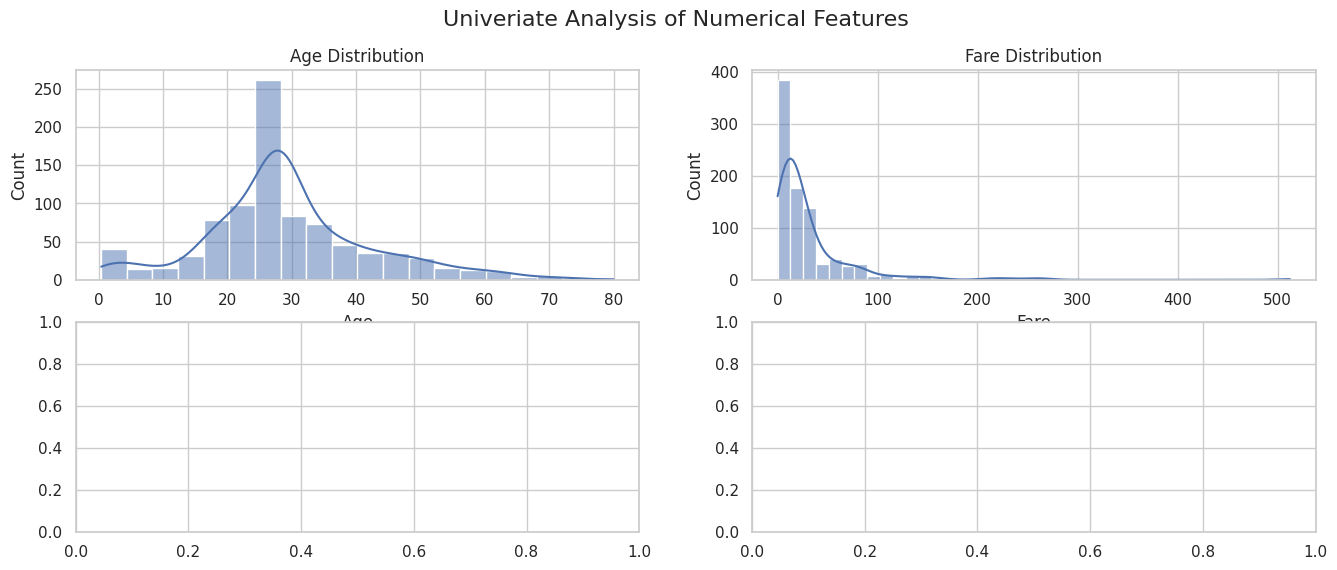

In [23]:
print('\nAnalyzing Numerical Features')

fig,axes=plt.subplots(2,2,figsize=(16,6))
fig.suptitle('Univeriate Analysis of Numerical Features',fontsize=16)


#plotting Age Distribution
sns.histplot(ax=axes[0,0],data=titanic_df, x='Age',kde=True, bins=20).set_title('Age Distribution')

#plotting Fare Distribution
sns.histplot(ax=axes[0,1],data=titanic_df, x='Fare',kde=True, bins=40).set_title('Fare Distribution')

plt.show()

**Key insights(Numerical Features) -**

- **Age** - The distribution peaks around 20-30 age range, filling median value of 28 to the missing value also contributes to the spike in the central bar

- **Fare** - The Fare is heavily skewed towards right as most fare are cheap with few expensive exceptions


####Step-5:  Bivariate Analysis

- **categorical vs. Numerical** - we can do this using barplot that showes the mean  of the numerical variable for each category.
We can also use box plot or violin plots.

- **Categorical vs. Categorical** - We can use stacked bar charts or contingency tables
- **Numerical vs. Numerical** - A scatter plot is the standard choice, with a correlation matrix being used to quantify the relationship


Bivariate Analysis


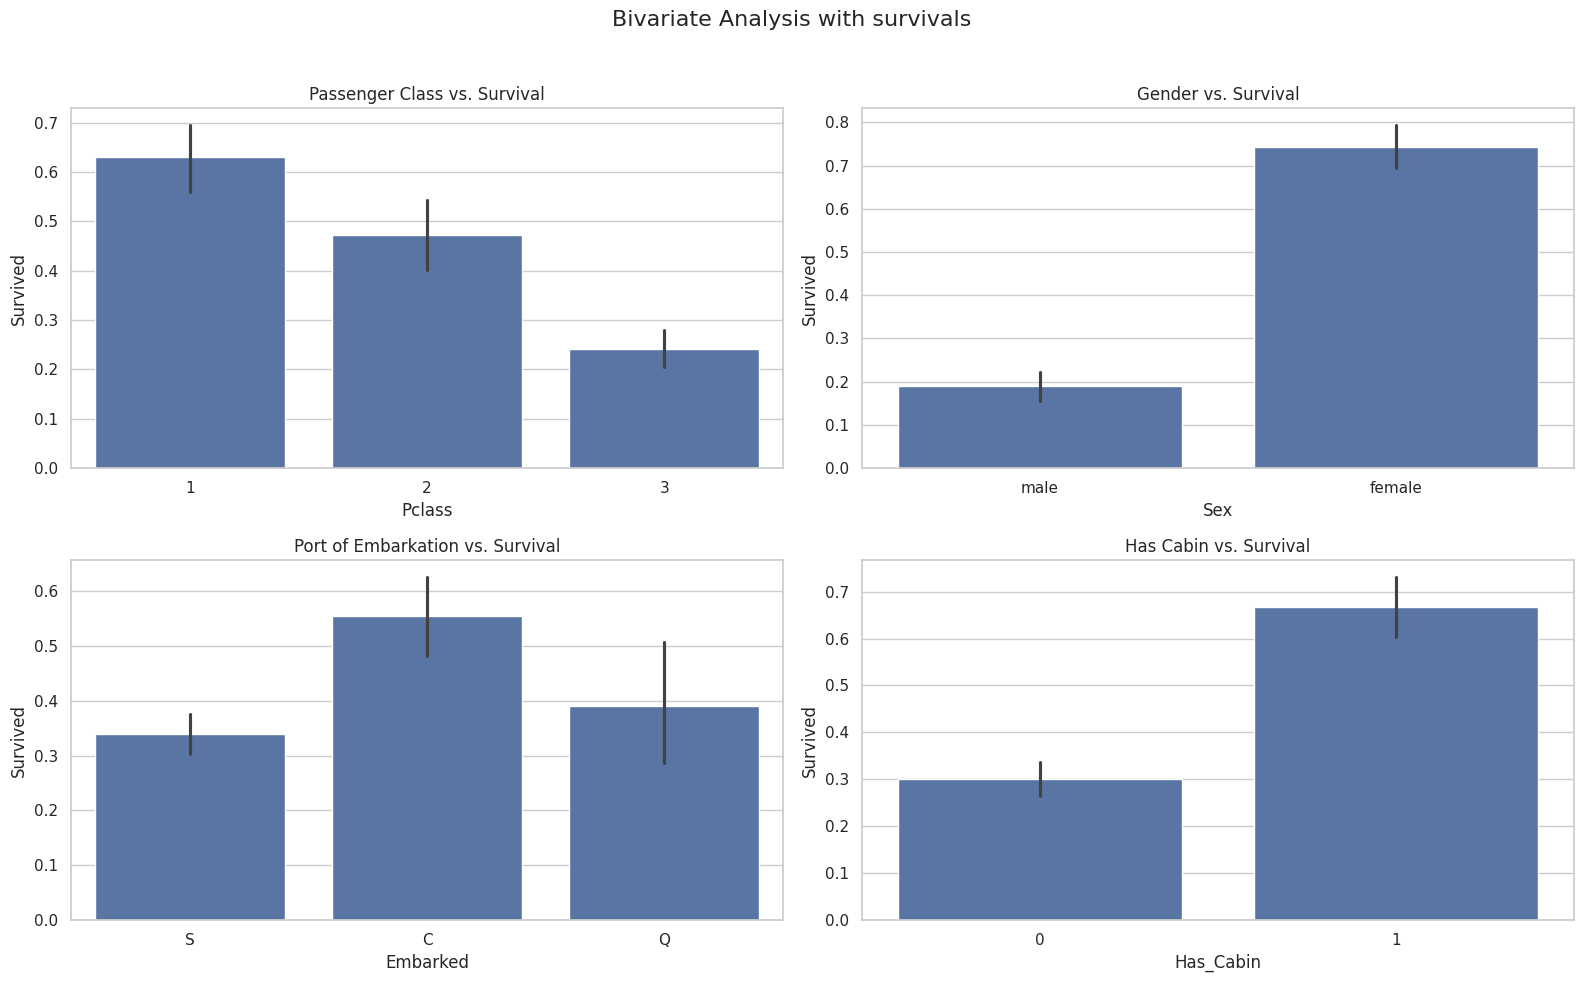

In [24]:
print("Bivariate Analysis")

fig,axes =plt.subplots(2,2,figsize=(16,10))
fig.suptitle('Bivariate Analysis with survivals',fontsize=16)


#Pclass vs. Survived
sns.barplot(ax=axes[0,0],x='Pclass',y='Survived',data=titanic_df).set_title('Passenger Class vs. Survival')

#Sex vs Survived
sns.barplot(ax=axes[0,1],x='Sex',y='Survived',data=titanic_df).set_title('Gender vs. Survival')

#Embarked vs. survived
sns.barplot(ax=axes[1,0],x='Embarked',y='Survived',data=titanic_df).set_title('Port of Embarkation vs. Survival')

#Has_cabin vs. Survived
sns.barplot(ax=axes[1,1],x='Has_Cabin',y='Survived',data=titanic_df).set_title('Has Cabin vs. Survival')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


#

#

####Key Insights(Bivariate):

- **Pclass** - 1st class passenger had 60% survival rate
- **Gender** - More than 70% female survived
- **Embarked** - Passenger embarking from Cherbough('C') had a higher survival rates from those from other ports
- **Has Cabin** - Passengers with a registered cabin had a much higher survival rate. This lis likely corelated with being in 1st class

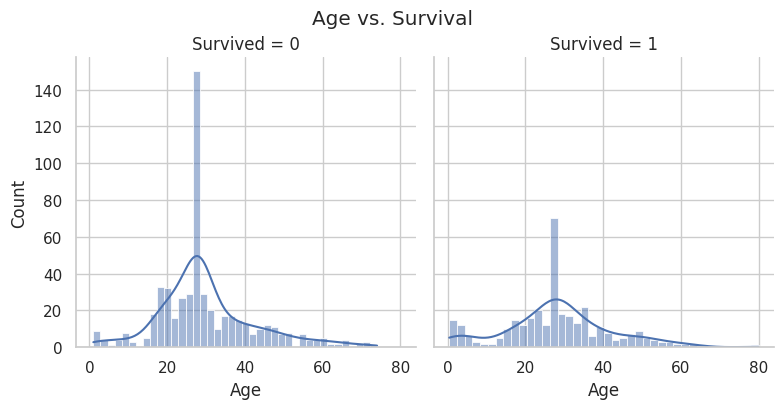

In [37]:
#Age vs survival

g= sns.FacetGrid(col='Survived',data=titanic_df,height=4)
g.map(sns.histplot,'Age',bins=40,kde=True)
plt.suptitle('Age vs. Survival',y=1.02)
plt.show()

####Key Insights
- infants and young tean children had higher probablity of survival
- Young adults(20-40) were highest amoung the non-survived
- Oldest passengers(above 80 Yrs)  did not survive
- note (as we had used median age to fillna,  we are seeing spike around that age bar in both the bars)


####Deeper Dive - outlier analysis for 'Fare'

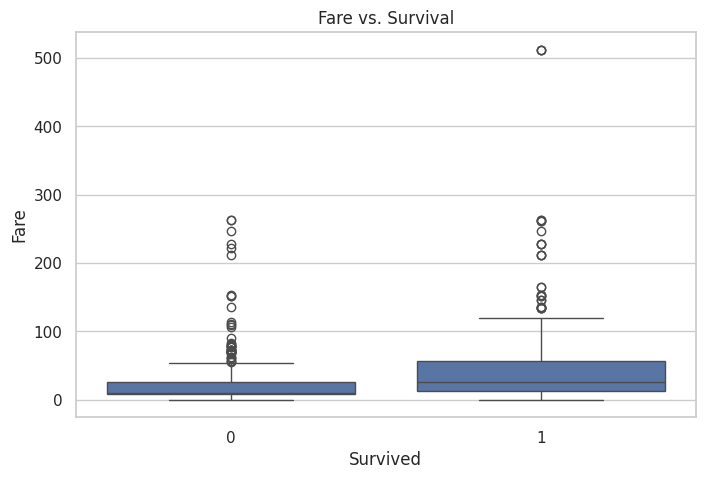

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived',y='Fare',data=titanic_df)
plt.title('Fare vs. Survival')
plt.show()


#### Observation

- Most fare are below $100, but there are many outliers here, these are likely 1st Class passenger who booked luxurius suites. For some ML Model handeling these outliers would be immportant through log transformation

#### Step 6 - Feature Engineering

- **combining Features:** Creating a new feature by combining others (e.g., *sibSp* + *Parch* = *Family*)
- **Extracting from Text:** Pulling out specific information from a text feature (e.g., extracting title from *Name* column)
- **Binning:** converting numerical Features into a categorical one like (e.g., binning *Age* into bins like 'Child','Adults','Senior')

In [39]:
#create a 'familySize' Feature

titanic_df['FamilySize']=titanic_df['SibSp']+titanic_df['Parch']+1 #+1 for the person themselves

#create an 'ISAlone' Feature
titanic_df['ISAlone']=0
titanic_df.loc[titanic_df['FamilySize']==1,'ISAlone']=1

print("Created 'FamilySize and 'IsAlone' Features:")
print(titanic_df[['FamilySize','ISAlone']].head())


Created 'FamilySize and 'IsAlone' Features:
   FamilySize  ISAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1


Text(0.5, 1.0, 'Is Alone vs. Survival')

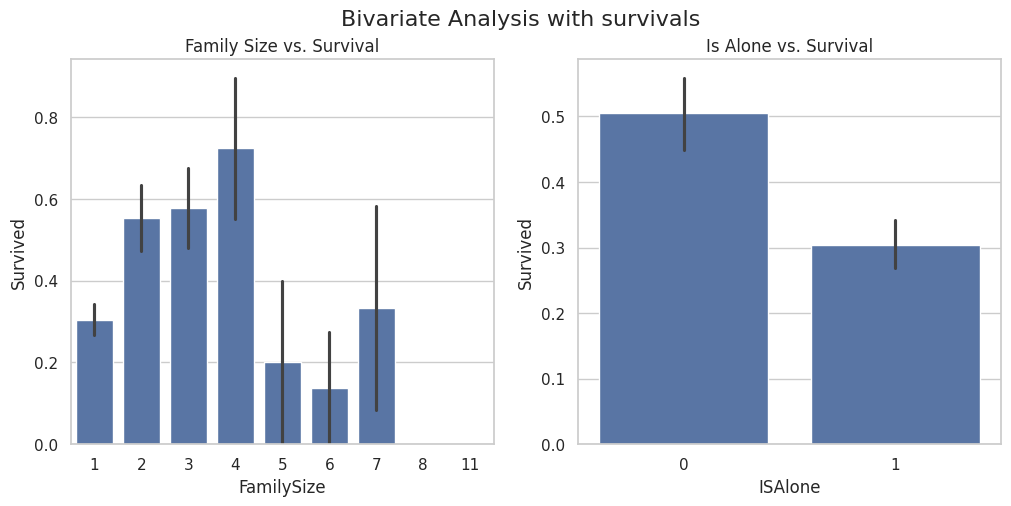

In [43]:
#analyzing the new Features 'FamilySize' and 'IsAlone' against survival

fig,axes=plt.subplots(1,2,figsize=(12,5))
fig.suptitle('Bivariate Analysis with survivals',fontsize=16)

#FamilySize vs. Survival
sns.barplot(ax=axes[0],x='FamilySize',y='Survived',data=titanic_df).set_title('Family Size vs. Survival')

#IsAlone vs Survival
sns.barplot(ax=axes[1],x='ISAlone',y='Survived',data=titanic_df).set_title('Is Alone vs. Survival')

####Insight

- family  with 2-4 members had more survival rate than smaller family
- Very large family had a poor survival rate
-  those who were alone had a low survival rate around 30%

In [44]:

# Extract Title from Name colume
titanic_df['Title']=titanic_df['Name'].str.extract('([A-Za-z]+)\.',expand=False)

#let's see the diff titles

print("Extracted Title")
titanic_df['Title'].value_counts()

Extracted Title


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2544747409.py:2: SyntaxWarning: invalid escape sequence '\.'
  titanic_df['Title']=titanic_df['Name'].str.extract('([A-Za-z]+)\.',expand=False)


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [45]:
#reduce cardinality by simplifying and grouping titles into Rare

titanic_df['Title']=titanic_df['Title'].replace(['Ms','Mlle'],'Miss')
titanic_df['Title']=titanic_df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
titanic_df['Title']=titanic_df['Title'].replace(['Dr','Col','Major','Jonkheer','Capt','Rev','Don','Sir'],'Rare')

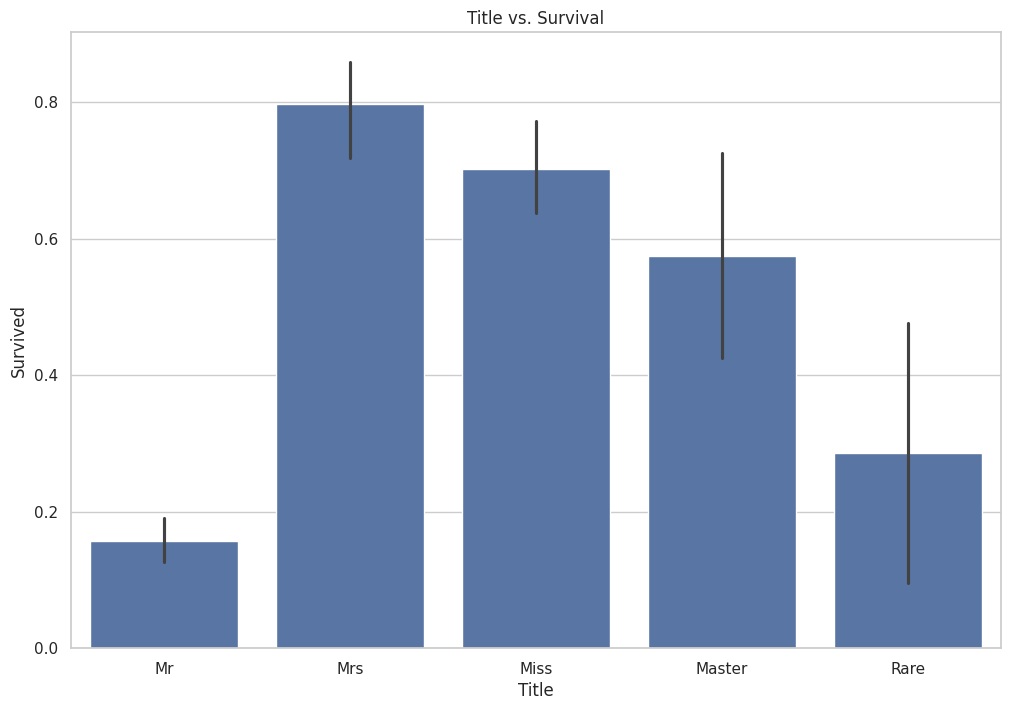

In [46]:
plt.figure(figsize=[12,8])


sns.barplot(x='Title',y='Survived',data=titanic_df)
plt.title('Title vs. Survival')
plt.show()

##Femaile across all class had higher survival rate compared to men

####Survival Rate by Title - Insights

- **Miss,Mrs had a higher survival rate and Master had a higher survival rate**
this confirms that Female and young boys had a higher survival rate where as men with title Mr. had low survival rate. Reinforcing Saving Women can Kids first.

#### Multivariate Analysis
- Explore interactions between multiple variables simultanously, nicluding New Engineered Features  

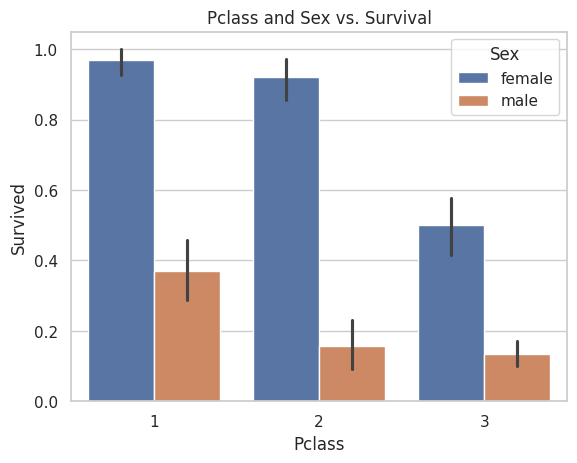

In [50]:
#Survival Rate by Pclass and Sex

sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)
plt.title('Pclass and Sex vs. Survival')
plt.show()

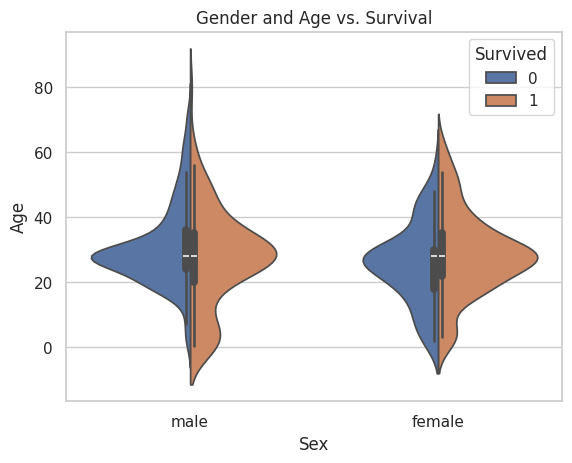

In [53]:
#violen plot to see the age distribution and survival rate

sns.violinplot(x='Sex',y='Age',hue='Survived',data=titanic_df,split=True)
plt.title('Gender and Age vs. Survival')
plt.show()

- for Males, young kids survived more most of the male non-survivors were from the age group 20-30
- For Female, the distribution of survivors is much broader, indicating that females of all age had a good chance of survival    

####Correlation Analysis



Text(0.5, 1.0, 'correlation Matrix of numerical Features')

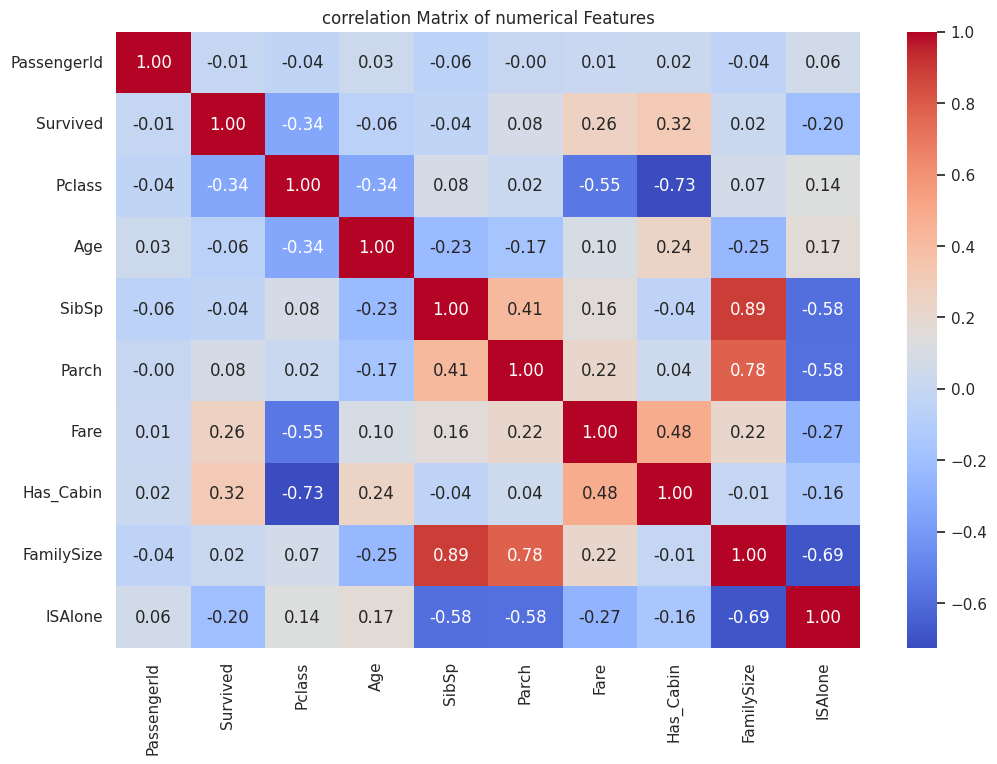

In [55]:
#correlation heatmap for numerical Features

plt.figure(figsize=(12,8))
numeric_cols=titanic_df.select_dtypes(include=np.number)
correlation_matrix=numeric_cols.corr()
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm',fmt='.2f')
plt.title('correlation Matrix of numerical Features')



####Insights

- Survived has a strong correlation with Has_cabin and Fare, and a -ve correlation with Pclass and IsAlone
- Pclass and Fare are strongly negetively correlated as (1st class = high Fare)
-FamilySize column is composed of SibSp and Parch column hence it is showing strong +ve correlation


In [57]:
#install ydata-profiling

!pip install ydata-profiling -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.1 MB/s eta 0:00:00


In [60]:
#Generate the profiling report

from ydata_profiling import ProfileReport

profile=ProfileReport(titanic_df,title='Titanic Dataset Profiling Report')

#display the report in the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 43.39it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [61]:
# Save the report in an HTML file:

profile.to_file("Titanic_Dataset_Profiling_Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Has_Cabin  
0      0         A/5 21171   7.2500        S          0  
1      0          PC 17599  71.2833        C          1  
2      0  STON/O2. 3101282   7.9250        S          0  
3      0            113803  53.1000        S          1  
4      0            373450   8.0500        S          0